In [19]:

from typing import List

import matplotlib.pyplot as plt
import numpy as np
import os

from proc_code import plot_style
from proc_code import process_data
from proc_code import utils
from proc_code import metadata
from proc_code import mac_lookup

os.makedirs("plots", exist_ok=True)
os.makedirs("output", exist_ok=True)

### Load dataset

In [20]:
METADATA = metadata.read_charger_metadata_table()

for plug in METADATA.plugs.values():
    process_data.load_or_process_plug(plug, 1)

for plug in METADATA.plugs.values():
    if not plug.final_sync_with_disk:
        process_data.save_plug(plug)

### Statistics

In [21]:
print("Plugs: ", len(np.unique([p.id for p in METADATA.plugs.values()])))
print("Chargers: ", len(np.unique([c.id for c in METADATA.chargers.values()])))
print("Parks: ", len(np.unique([p.id for p in METADATA.parks.values()])))
print("Manufacturers: ", len(np.unique([c.manufacturer for c in METADATA.chargers.values() if len(c.manufacturer)])))

Plugs:  397
Chargers:  325
Parks:  149
Manufacturers:  27


In [22]:
print("Manufacturers: ", np.unique([c.manufacturer for c in METADATA.chargers.values() if len(c.manufacturer)]))

Manufacturers:  ['ABB' 'Alpitronic' 'Alpitronics' 'BYD' 'Chargemaster' 'Chargepoint'
 'Compleo' 'DBT' 'Delta' 'EKOenergetyka' 'EVBox' 'EVTronic' 'Eaton'
 'Efacec' 'Evtec' 'Evtronic' 'Green motion' 'IES' 'Kempower' 'Kreisel'
 'Porsche' 'Setec' 'Siemens' 'Starcharge' 'Tesla' 'Tritium'
 'Wall Box Chargers S.L.U']


In [23]:
print("Networks: ", np.unique([c.network for c in METADATA.chargers.values() if len(c.manufacturer)]))

Networks:  ['' 'Allego' 'BMW' 'BP' 'Blink' 'Chargepoint' 'ESB' 'EVPoint' 'Elen'
 'Evpass' 'Evyve' 'Fastned' 'Genie Point' 'GeniePoint' 'Gofast'
 'Gridserve' 'Instavolt' 'Ionity' 'Lidl' 'MFG' 'Mobility' 'Mobilty' 'Move'
 'NatuRELL' 'OMW' 'Oiken' 'Osprey' 'PodPoint' 'Porsche' 'Qelo' 'Setec'
 'Shell' 'Shell Recharge' 'SmartCharge' 'Socar' 'Tesla' 'Wenea' 'iischi']


In [24]:
def print_counts(l: List[str]):
    vals, cnts = np.unique(l, return_counts=True)
    for x in zip(vals[np.argsort(-cnts)], cnts[np.argsort(-cnts)]):
        print(x[0], x[1])

In [25]:
print("Countries (chargers)")
print_counts([p.id.split(".")[0] for p in METADATA.chargers.values()])

Countries (chargers)
UK 144
CH 117
HU 48
HR 16


In [26]:
print("Networks (chargers)")
print_counts([c.network for c in METADATA.chargers.values()])

Networks (chargers)
 64
Tesla 48
BP 44
Ionity 25
ESB 21
Gridserve 18
Move 13
Shell 12
Osprey 9
Fastned 8
Gofast 7
Instavolt 6
Blink 5
Lidl 4
Allego 4
EVPoint 4
Evpass 3
Oiken 2
SmartCharge 2
MFG 2
Mobility 2
Mobilty 2
Shell Recharge 2
GeniePoint 2
Chargepoint 2
Porsche 2
Socar 1
BMW 1
Setec 1
Genie Point 1
PodPoint 1
OMW 1
NatuRELL 1
Wenea 1
Elen 1
Evyve 1
Qelo 1
iischi 1


In [27]:
print("Manufacturers (plugs)")
print_counts([p.charger.manufacturer for p in METADATA.plugs.values()])

Manufacturers (plugs)
ABB 113
Alpitronics 74
Tesla 48
Evtec 25
Efacec 24
Chargemaster 23
Tritium 22
Kempower 10
Eaton 7
Chargepoint 6
Siemens 5
EVBox 5
Alpitronic 4
Starcharge 4
Porsche 4
Green motion 3
 3
EKOenergetyka 3
Delta 2
DBT 2
BYD 2
Wall Box Chargers S.L.U 2
EVTronic 1
IES 1
Kreisel 1
Setec 1
Compleo 1
Evtronic 1


In [28]:
# Town + rural added together in paper
print("Location (plugs)")
print_counts([p.charger.park.type for p in METADATA.plugs.values()])
print()
print("Environment (plugs)")
print_counts([p.charger.park.type2 for p in METADATA.plugs.values()])

Location (plugs)
City 199
Town 111
Highway 85
Rural 2

Environment (plugs)
Business 164
Parking 53
Gas 47
Services 43
Roadside 35
Rest 31
Dealer 23
Portable 1


### Version Results

In [29]:
stats, all_breakdowns = process_data.compute_stats(list(METADATA.plugs.values()))

In [30]:
def get_percent(entry: dict[int, int]):
    yes = entry[1] + entry[2] # Count sometimes as yes
    no = entry[0]
    return 100 * yes / (yes + no)

def stats_to_array(stat: dict[str, dict[int, int]], rows):
    res = np.array([[stat[k][0], stat[k][1] + stat[k][2]] if k in stat.keys() else [0, 0] for k in rows])
    #print(res)
    #print(np.sum(res))
    return res
years: List[str] = ["2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020", "2021", "2022", "2023"]

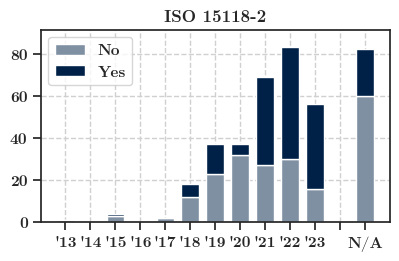

ISO 15118-2 percentage in 2023 devices %  71.42857142857143


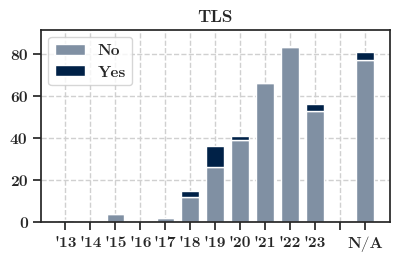

In [31]:
plot_style.barplot([f"'{x[2:]}" for x in years] + ["", "N/A"], ["No", "Yes"], stats_to_array(stats["V2V13"], years + ["", "????"]), 0.7)
plt.savefig("plots/iso2.pdf")
plt.title("ISO 15118-2")
plt.show()

print("ISO 15118-2 percentage in 2023 devices % ", get_percent(stats["V2V13"]["2023"]))

plot_style.barplot([f"'{x[2:]}" for x in years] + ["", "N/A"], ["No", "Yes"], stats_to_array(stats["TLS_V2"], years + ["", "????"]), 0.7)
plt.savefig("plots/tls2.pdf")
plt.title("TLS")
plt.show()

In [32]:
def format_entry(entry: dict[int, int]):
    return f"{entry[2] + entry[1]} / {entry[0]}"

col_names = {
    "ALL": "All",

    "????": "Unknown",
    "2013": "2013",
    "2014": "2014",
    "2015": "2015",
    "2016": "2016",
    "2017": "2017",
    "2018": "2018",
    "2019": "2019",
    "2020": "2020",
    "2021": "2021",
    "2022": "2022",
    "2023": "2023",
}

row_names = {
    "TLS_SDP": "TLS in SDP",

    "TLS_V20": "TLS 1.3 for ISO 15118-20",
    "TLS_V2": "TLS 1.2+ for ISO 15118-2",
    "TLS_Strong": "TLS 1.2 recommended ciphers",
    "TLS_Weak": "TLS 1.2 not recommended ciphers",
    "TLS_Old": "TLS 1.1 and older",

    "V20DC": "ISO 15118-20 DC",
    "V2V13": "ISO 15118-2:2013",
    "V2V10": "ISO 15118-2:2010",
    "DIN": "DIN SPEC 70121",
}

print("All TLS support % ", get_percent(stats["TLS_SDP"]["ALL"]))
print("ISO 15118-2 TLS support % ", get_percent(stats["TLS_V2"]["ALL"]))

table_hdr = [""] + [v for v in col_names.values()]
table_body = [
        [row_names[k]] + [format_entry(v[kk]) for kk in col_names.keys()] for k, v in stats.items() if k in row_names
    ]
with open("output/all_data.tex", "w") as f:
    f.write(" & ".join(table_hdr))
    f.write("\n\\midrule\\\\\n")
    for line in table_body:
        f.write(" & ".join(line))
        f.write(" \\\\\n")

All TLS support %  12.020460358056265
ISO 15118-2 TLS support %  5.714285714285714


### HPGP

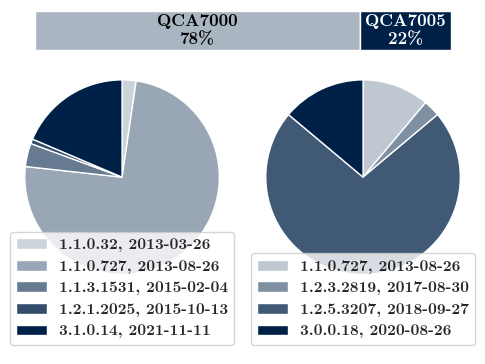

In [33]:
pie_dict = utils.count_elements([x.final.phy_fw for x in METADATA.plugs.values() if x.final is not None and len(x.final.phy_fw) > 0])
pie_dict_7000 = {key: value for key, value in sorted(pie_dict.items()) if key[10] == "0"}
pie_dict_7005 = {key: value for key, value in sorted(pie_dict.items()) if key[10] != "0"}

fw_display_names = {
    'MAC-QCA7000-1.1.0.32-01-20130326-FINAL': "1.1.0.32, 2013-03-26",
    'MAC-QCA7000-1.1.0.727-02-20130826-FINAL': "1.1.0.727, 2013-08-26",
    'MAC-QCA7000-1.1.3.1531-00-20150204-CS': "1.1.3.1531, 2015-02-04",
    'MAC-QCA7000-1.2.1.2025-00-20151013-CS': "1.2.1.2025, 2015-10-13",
    'MAC-QCA7000-3.1.0.14-00-20211111-CS': "3.1.0.14, 2021-11-11",

    'MAC-QCA7005-1.1.0.727-02-20130826-FINAL': "1.1.0.727, 2013-08-26",
    'MAC-QCA7005-1.2.3.2819-00-20170830-CS': "1.2.3.2819, 2017-08-30",
    'MAC-QCA7005-1.2.5.3207-00-20180927-CS': "1.2.5.3207, 2018-09-27",
    'MAC-QCA7005-3.0.0.18-00-20200826-CS': "3.0.0.18, 2020-08-26",
}

def doplot(data):
    plot_style.set_cycler(len(data))
    wedges, _ = plt.pie(data.values(), startangle=90, counterclock=False)
    plt.legend(wedges, [fw_display_names[k] for k in data.keys()], loc="lower center")
    plt.xlim(-0.9, 0.9)
    plt.ylim(-1.8, 1.7)
    

fig = plt.figure(figsize=(5,3.8))
gs = fig.add_gridspec(1,2, width_ratios=[1,1])

widths = np.array([np.sum(list(pie_dict_7000.values())), 0, np.sum(list(pie_dict_7005.values()))])
starts = np.cumsum(widths) - widths

ax = fig.add_subplot(gs[0,:])
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.set_xlim(0, np.sum(widths))

category_names = [f"QCA7000\n{(100*widths[0]/(widths[0]+widths[2])):.0f}%", "", f"QCA7005\n{(100*widths[2]/(widths[0]+widths[2])):.0f}%"]
category_colors = plot_style.set_cycler(3)

for i, (colname, color) in enumerate(zip(category_names, category_colors)):
    rects = ax.barh(0, widths[i], left=starts[i], height=1.3,
                label=colname, color=color)

    r, g, b = color
    text_color = 'white' if (r + g + b) < 0.7 else 'black'
    ax.bar_label(rects, [colname], label_type='center', color=text_color)
ax.axis("off")
    
ax.set_ylim(-11, 0.7, auto=False)

ax1 = fig.add_subplot(gs[0,0])
doplot(pie_dict_7000)


ax2 = fig.add_subplot(gs[0,1])
doplot(pie_dict_7005)

plt.tight_layout()
plt.savefig("plots/fw_all.pdf")
plt.show()

In [34]:
#print(pie_dict)
pie_dict_all = {}
pie_count = 0
for key, value in pie_dict.items():
    if fw_display_names[key] not in pie_dict_all:
        pie_dict_all[fw_display_names[key]] = 0
    pie_dict_all[fw_display_names[key]] += value
    pie_count += value

pie_dict_all = {key: value for key, value in sorted(pie_dict_all.items())}

#print(pie_count)
sums = np.cumsum(list(pie_dict_all.values())) / pie_count
print("HPGP Firmware version, release date, percentage older or equal")
print(np.array(list(zip(pie_dict_all.keys(), sums))))

HPGP Firmware version, release date, percentage older or equal
[['1.1.0.32, 2013-03-26' '0.01818181818181818']
 ['1.1.0.727, 2013-08-26' '0.6242424242424243']
 ['1.1.3.1531, 2015-02-04' '0.6545454545454545']
 ['1.2.1.2025, 2015-10-13' '0.6606060606060606']
 ['1.2.3.2819, 2017-08-30' '0.6666666666666666']
 ['1.2.5.3207, 2018-09-27' '0.8242424242424242']
 ['3.0.0.18, 2020-08-26' '0.8545454545454545']
 ['3.1.0.14, 2021-11-11' '1.0']]


### MAC OUI

In [35]:
print(mac_lookup.mac_oui_lookup([p.final.hle_mac for p in METADATA.plugs.values()]))

209BCBXXXXXX
209B7CXXXXXX
209B84XXXXXX
209B80XXXXXX
{'Atheros Communications': 1, 'congatec GmbH': 2, 'EcoG': 6, 'GloQuad': 2, 'Huawei Technologies Co.,Ltd': 1, 'I2SE GmbH': 34, 'ICANN, IANA Department': 1, 'Kempower Oyj': 10, 'KSE GmbH': 4, 'Locally Administered': 108, 'Microchip Technology Inc.': 138, 'NXP Semiconductors': 7, 'Tesla,Inc.': 48, 'Tritium Pty Ltd': 20, 'Unknown': 4, 'Wall Box Chargers, S.L.': 1}


### Plot of EVs

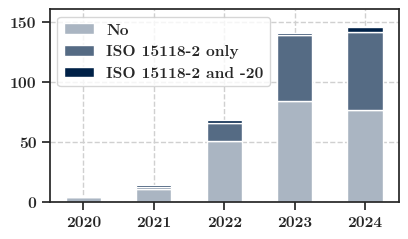

In [36]:
plot_style.barplot(
    [2020, 2021, 2022, 2023, 2024],
    ("No", "ISO 15118-2 only", "ISO 15118-2 and -20"),
    np.array([
        [4, 0, 0],
        [11, 1, 2],
        [51, 15, 2],
        [84, 55, 2],
        [77, 65, 4],
    ])
)

plt.savefig("plots/ev_support.pdf")
plt.show()